In [1]:
import os
import pandas as pd
import glob
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

print(os.listdir("C:/Users/오원석/user_name/elo-merchant-category-recommendation"))

['Data_Dictionary.xlsx', 'historical_transactions.csv', 'merchants.csv', 'new_merchant_transactions.csv', 'sample_submission.csv', 'test.csv', 'train.csv']


In [2]:
hist_df = pd.read_csv("C:/Users/오원석/user_name/elo-merchant-category-recommendation/historical_transactions.csv")
hist_df.head()

,authorized_flag,card_id,city_id,category_1,installments,category_3,merchant_category_id,merchant_id,month_lag,purchase_amount,purchase_date,category_2,state_id,subsector_id
0,Y,C_ID_4e6213e9bc,88,N,0,A,80,M_ID_e020e9b302,-8,-0.703331,2017-06-25 15:33:07,1.0,16,37
1,Y,C_ID_4e6213e9bc,88,N,0,A,367,M_ID_86ec983688,-7,-0.733128,2017-07-15 12:10:45,1.0,16,16
2,Y,C_ID_4e6213e9bc,88,N,0,A,80,M_ID_979ed661fc,-6,-0.720386,2017-08-09 22:04:29,1.0,16,37
3,Y,C_ID_4e6213e9bc,88,N,0,A,560,M_ID_e6d5ae8ea6,-5,-0.735352,2017-09-02 10:06:26,1.0,16,34
4,Y,C_ID_4e6213e9bc,88,N,0,A,80,M_ID_e020e9b302,-11,-0.722865,2017-03-10 01:14:19,1.0,16,37


In [3]:
hist_df.size

407573054

In [4]:
history_reader = pd.read_csv("C:/Users/오원석/user_name/elo-merchant-category-recommendation/historical_transactions.csv", chunksize = 1000)
type(history_reader)

hist_chunk = None
for chunk in history_reader:
    hist_chunk = chunk
    print(hist_chunk)
    break

    authorized_flag          card_id  city_id category_1  installments  \
0                 Y  C_ID_4e6213e9bc       88          N             0   
1                 Y  C_ID_4e6213e9bc       88          N             0   
2                 Y  C_ID_4e6213e9bc       88          N             0   
3                 Y  C_ID_4e6213e9bc       88          N             0   
4                 Y  C_ID_4e6213e9bc       88          N             0   
5                 Y  C_ID_4e6213e9bc      333          N             0   
6                 Y  C_ID_4e6213e9bc       88          N             0   
7                 Y  C_ID_4e6213e9bc        3          N             0   
8                 Y  C_ID_4e6213e9bc       88          N             0   
9                 Y  C_ID_4e6213e9bc       88          N             0   
10                Y  C_ID_4e6213e9bc       88          N             0   
11                Y  C_ID_4e6213e9bc       -1          N             0   
12                Y  C_ID_4e6213e9bc  

In [5]:
type(hist_chunk)

pandas.core.frame.DataFrame

In [6]:
history_columns = list(hist_chunk.columns)
print(history_columns)

['authorized_flag', 'card_id', 'city_id', 'category_1', 'installments', 'category_3', 'merchant_category_id', 'merchant_id', 'month_lag', 'purchase_amount', 'purchase_date', 'category_2', 'state_id', 'subsector_id']


In [7]:
hist_chunk.dtypes

authorized_flag          object
card_id                  object
city_id                   int64
category_1               object
installments              int64
category_3               object
merchant_category_id      int64
merchant_id              object
month_lag                 int64
purchase_amount         float64
purchase_date            object
category_2              float64
state_id                  int64
subsector_id              int64
dtype: object

In [8]:
def reduce_mem_usage(df, verbose=True):
    numerics = ['int16', 'int32', 'int64', 'float16', 'float32', 'float64']
    start_mem = df.memory_usage().sum() / 1024**2    
    for col in df.columns:
        col_type = df[col].dtypes
        if df[col].dtypes == 'object':
            df[col] = df[col].astype('category')
        if col_type in numerics:
            c_min = df[col].min()
            c_max = df[col].max()
            if str(col_type)[:3] == 'int':
                if c_min > np.iinfo(np.int8).min and c_max < np.iinfo(np.int8).max:
                    df[col] = df[col].astype(np.int8)
                elif c_min > np.iinfo(np.int16).min and c_max < np.iinfo(np.int16).max:
                    df[col] = df[col].astype(np.int16)
                elif c_min > np.iinfo(np.int32).min and c_max < np.iinfo(np.int32).max:
                    df[col] = df[col].astype(np.int32)
                elif c_min > np.iinfo(np.int64).min and c_max < np.iinfo(np.int64).max:
                    df[col] = df[col].astype(np.int64)  
            else:
                if c_min > np.finfo(np.float16).min and c_max < np.finfo(np.float16).max:
                    df[col] = df[col].astype(np.float16)
                elif c_min > np.finfo(np.float32).min and c_max < np.finfo(np.float32).max:
                    df[col] = df[col].astype(np.float32)
                else:
                    df[col] = df[col].astype(np.float64)    
    end_mem = df.memory_usage().sum() / 1024**2
    if verbose: print('Mem. usage decreased to {:5.2f} Mb ({:.1f}% reduction)'.format(end_mem, 100 * (start_mem - end_mem) / start_mem))
    return df

In [10]:
import gc

hist_trans = reduce_mem_usage(hist_df)
gc.collect()

Mem. usage decreased to 1622.97 Mb (0.0% reduction)


20

In [11]:
hist_trans.dtypes

authorized_flag         category
card_id                 category
city_id                    int16
category_1              category
installments               int16
category_3              category
merchant_category_id       int16
merchant_id             category
month_lag                   int8
purchase_amount          float32
purchase_date           category
category_2               float16
state_id                    int8
subsector_id                int8
dtype: object

In [12]:
hist_trans.head()

,authorized_flag,card_id,city_id,category_1,installments,category_3,merchant_category_id,merchant_id,month_lag,purchase_amount,purchase_date,category_2,state_id,subsector_id
0,Y,C_ID_4e6213e9bc,88,N,0,A,80,M_ID_e020e9b302,-8,-0.703331,2017-06-25 15:33:07,1.0,16,37
1,Y,C_ID_4e6213e9bc,88,N,0,A,367,M_ID_86ec983688,-7,-0.733128,2017-07-15 12:10:45,1.0,16,16
2,Y,C_ID_4e6213e9bc,88,N,0,A,80,M_ID_979ed661fc,-6,-0.720386,2017-08-09 22:04:29,1.0,16,37
3,Y,C_ID_4e6213e9bc,88,N,0,A,560,M_ID_e6d5ae8ea6,-5,-0.735352,2017-09-02 10:06:26,1.0,16,34
4,Y,C_ID_4e6213e9bc,88,N,0,A,80,M_ID_e020e9b302,-11,-0.722865,2017-03-10 01:14:19,1.0,16,37


In [13]:
hist_trans.columns

Index(['authorized_flag', 'card_id', 'city_id', 'category_1', 'installments',
       'category_3', 'merchant_category_id', 'merchant_id', 'month_lag',
       'purchase_amount', 'purchase_date', 'category_2', 'state_id',
       'subsector_id'],
      dtype='object')

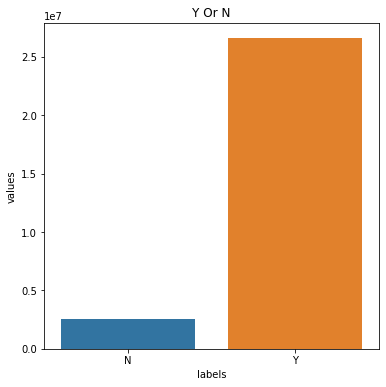

In [14]:
temp = hist_trans["authorized_flag"].value_counts()
df = pd.DataFrame({'labels':temp.index,
                'values':temp.values})
plt.figure(figsize=(6,6))
plt.title('Y Or N')
sns.barplot(x='labels', y='values', data=df)
plt.show()

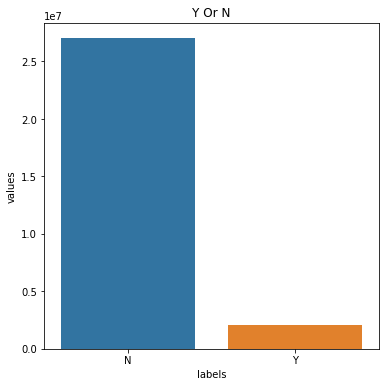

In [15]:
temp = hist_trans["category_1"].value_counts()
df = pd.DataFrame({'labels':temp.index,
                'values':temp.values})
plt.figure(figsize=(6,6))
plt.title('Y Or N')
sns.barplot(x='labels', y='values', data=df)
plt.show()

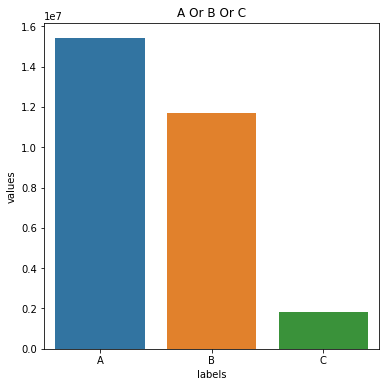

In [16]:
temp = hist_trans["category_3"].value_counts()
df = pd.DataFrame({'labels':temp.index,
                'values':temp.values})
plt.figure(figsize=(6,6))
plt.title('A Or B Or C')
sns.barplot(x='labels', y='values', data=df)
plt.show()

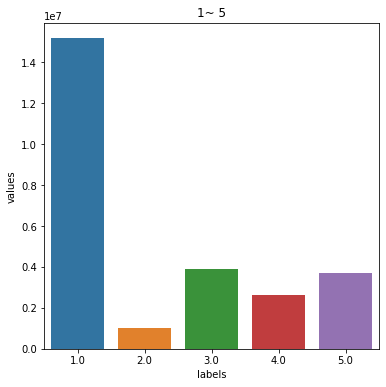

In [17]:
temp = hist_trans["category_2"].value_counts()
df = pd.DataFrame({'labels':temp.index,
                'values':temp.values})
plt.figure(figsize=(6,6))
plt.title('1~ 5')
sns.barplot(x='labels', y='values', data=df)
plt.show()

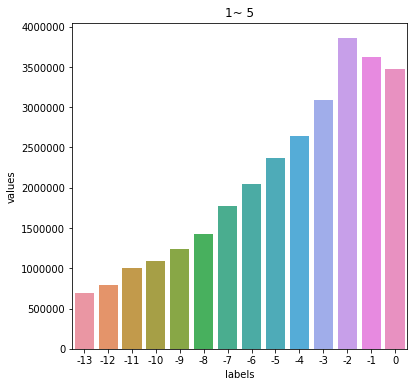

In [18]:
temp = hist_trans["month_lag"].value_counts()
df = pd.DataFrame({'labels':temp.index,
                'values':temp.values})
plt.figure(figsize=(6,6))
plt.title('1~ 5')
sns.barplot(x='labels', y='values', data=df)
plt.show()

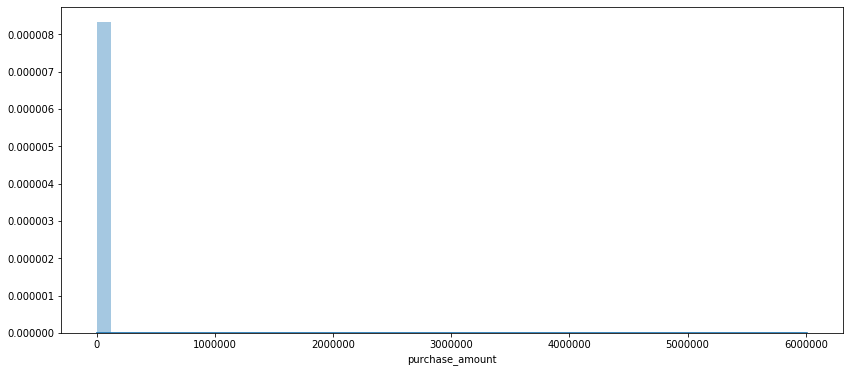

In [19]:
fg, ax = plt.subplots(figsize=(14,6))
sns.distplot(hist_trans['purchase_amount'])

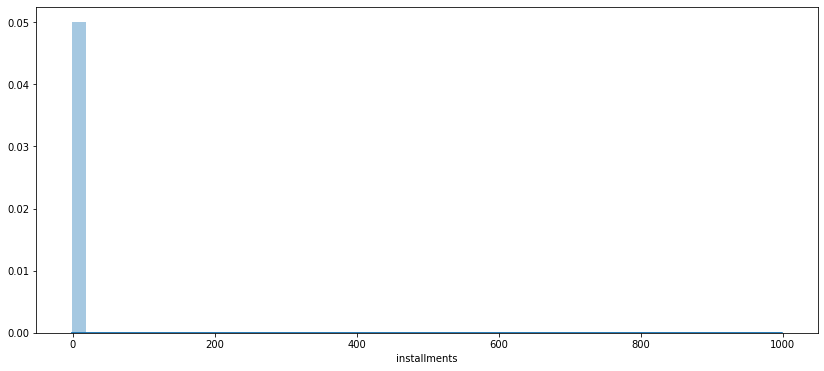

In [20]:
fg, ax = plt.subplots(figsize=(14,6))
sns.distplot(hist_trans['installments'])

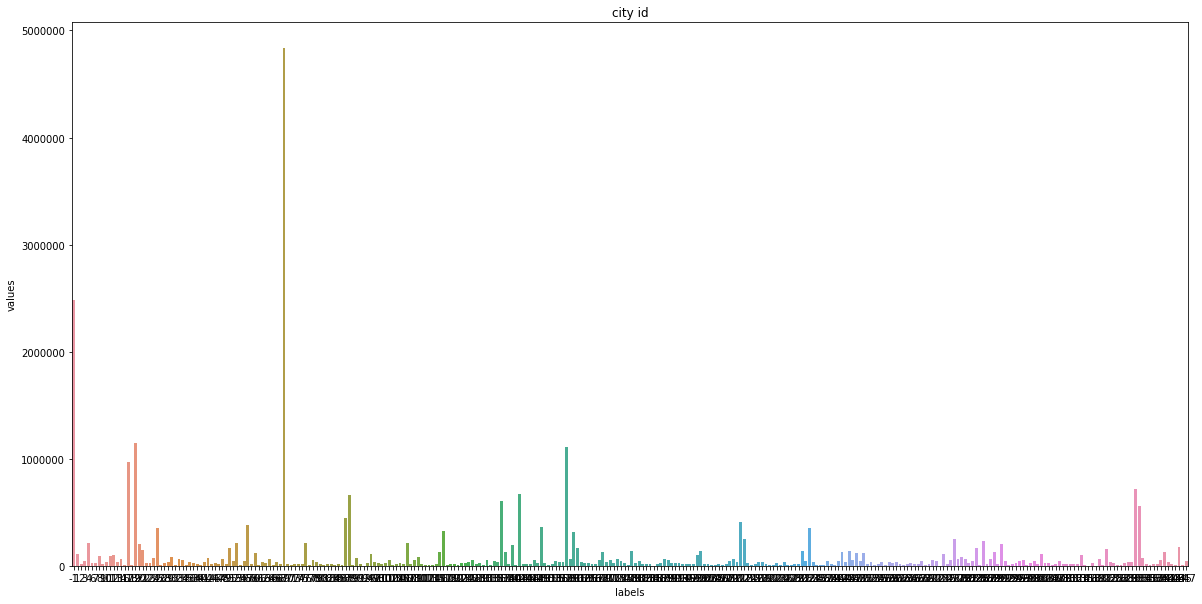

In [21]:
temp = hist_trans["city_id"].value_counts()
df = pd.DataFrame({'labels':temp.index,
                'values':temp.values})
plt.figure(figsize=(20,10))
plt.title('city id')
sns.barplot(x='labels', y='values', data=df)
plt.show()

In [23]:
hist_trans['authorized_flag']=hist_trans['authorized_flag'].map({'Y':1, 'N':0})
hist_trans['category_1']=hist_trans['category_1'].map({'Y':1, 'N':0})

In [24]:
hist_trans.head()

,authorized_flag,card_id,city_id,category_1,installments,category_3,merchant_category_id,merchant_id,month_lag,purchase_amount,purchase_date,category_2,state_id,subsector_id
0,1,C_ID_4e6213e9bc,88,0,0,A,80,M_ID_e020e9b302,-8,-0.703331,2017-06-25 15:33:07,1.0,16,37
1,1,C_ID_4e6213e9bc,88,0,0,A,367,M_ID_86ec983688,-7,-0.733128,2017-07-15 12:10:45,1.0,16,16
2,1,C_ID_4e6213e9bc,88,0,0,A,80,M_ID_979ed661fc,-6,-0.720386,2017-08-09 22:04:29,1.0,16,37
3,1,C_ID_4e6213e9bc,88,0,0,A,560,M_ID_e6d5ae8ea6,-5,-0.735352,2017-09-02 10:06:26,1.0,16,34
4,1,C_ID_4e6213e9bc,88,0,0,A,80,M_ID_e020e9b302,-11,-0.722865,2017-03-10 01:14:19,1.0,16,37


In [25]:
total = hist_trans.isnull().sum().sort_values(ascending = False)
percent = (hist_trans.isnull().sum()/hist_trans.isnull().count()*100).sort_values(ascending=False)
missing_data = pd.concat([total, percent], axis=1, keys=['Total','Percent'])
missing_data.head(20)

,Total,Percent
category_2,2652864,9.112500
category_3,178159,0.611970
merchant_id,138481,0.475678
subsector_id,0,0.000000
state_id,0,0.000000
purchase_date,0,0.000000
purchase_amount,0,0.000000
month_lag,0,0.000000
merchant_category_id,0,0.000000
installments,0,0.000000


In [27]:
def aggregate_historical_transactions(history):
   
    history.loc[:, 'purchase_date'] = pd.DatetimeIndex(history['purchase_date']).\
                                      astype(np.int64) * 1e-9
   
    agg_func = {
        'authorized_flag': ['sum', 'mean'],
        'merchant_id': ['nunique'],
        'city_id': ['nunique'],
        'purchase_amount': ['sum', 'median', 'max', 'min', 'std'],
        'installments': ['sum', 'median', 'max', 'min', 'std'],
        'purchase_date': [np.ptp],
        'month_lag': ['min', 'max']
        }
    agg_history = history.groupby(['card_id']).agg(agg_func)
    agg_history.columns = ['hist_' + '_'.join(col).strip()
                           for col in agg_history.columns.values]
    agg_history.reset_index(inplace=True)
   
    df = (history.groupby('card_id')
          .size()
          .reset_index(name='hist_transactions_count'))
   
    agg_history = pd.merge(df, agg_history, on='card_id', how='left')
   
    return agg_history

history = aggregate_historical_transactions(hist_trans)
del hist_trans

C:\anaconda_c\lib\site-packages\numpy\core\fromnumeric.py:2389: FutureWarning: Method .ptp is deprecated and will be removed in a future version. Use numpy.ptp instead.
  return ptp(axis=axis, out=out, **kwargs)


In [28]:
gc.collect()

63878

In [30]:
train=pd.read_csv("C:/Users/오원석/user_name/elo-merchant-category-recommendation/train.csv")

In [31]:
train = pd.merge(train, history, on='card_id', how='left')

In [32]:
train.head()

,first_active_month,card_id,feature_1,feature_2,feature_3,target,hist_transactions_count,hist_authorized_flag_sum,hist_authorized_flag_mean,hist_merchant_id_nunique,...,hist_purchase_amount_min,hist_purchase_amount_std,hist_installments_sum,hist_installments_median,hist_installments_max,hist_installments_min,hist_installments_std,hist_purchase_date_ptp,hist_month_lag_min,hist_month_lag_max
0,2017-06,C_ID_92a2005557,5,2,1,-0.820283,260,247,0.950000,94,...,-0.739395,0.212139,4,0.0,1,0,0.123314,20977987.0,-8,0
1,2017-01,C_ID_3d0044924f,4,1,0,0.392913,350,339,0.968571,142,...,-0.742400,0.384967,543,1.0,10,-1,1.510777,33717687.0,-12,0
2,2016-08,C_ID_d639edf6cd,2,2,0,0.688056,43,41,0.953488,13,...,-0.730138,0.087380,0,0.0,0,0,0.000000,35635623.0,-13,0
3,2017-09,C_ID_186d6a6901,4,3,0,0.142495,77,77,1.000000,50,...,-0.740897,0.261624,84,1.0,3,-1,0.588974,13375339.0,-5,0
4,2017-11,C_ID_cdbd2c0db2,1,3,0,-0.159749,133,128,0.962406,66,...,-0.746156,1.352094,182,1.0,12,1,1.896862,9405641.0,-3,0


In [33]:
train.columns

Index(['first_active_month', 'card_id', 'feature_1', 'feature_2', 'feature_3',
       'target', 'hist_transactions_count', 'hist_authorized_flag_sum',
       'hist_authorized_flag_mean', 'hist_merchant_id_nunique',
       'hist_city_id_nunique', 'hist_purchase_amount_sum',
       'hist_purchase_amount_median', 'hist_purchase_amount_max',
       'hist_purchase_amount_min', 'hist_purchase_amount_std',
       'hist_installments_sum', 'hist_installments_median',
       'hist_installments_max', 'hist_installments_min',
       'hist_installments_std', 'hist_purchase_date_ptp', 'hist_month_lag_min',
       'hist_month_lag_max'],
      dtype='object')